### 0 - Setup 

In [714]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from datetime import date, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

### 1 - Feature Engineering

In [631]:
cwd = os.getcwd()
print(cwd)

/Users/ndeen/git/flu_forecasting


In [632]:
folder_path = cwd+r'/data'

# Open the folder
files = os.listdir(folder_path)

file_names = []
# Print the file names
for file in files:
    print(file)
    file_names.append(file)

flu.csv
WHO_NREVSS_Clinical_Labs.csv
WHO_NREVSS_Public_Health_Labs.csv
cold.csv
musclepain.csv
muscleache.csv
chills.csv
commoncold.csv
ILINet.csv
fever.csv
runnynose.csv


In [633]:
folder_path+'/'+file_names[0]

'/Users/ndeen/git/flu_forecasting/data/flu.csv'

In [634]:
# cdc flu data (40th week of 2015 - 42nd week of 2022)
clinical_labs = pd.read_csv(folder_path+'/'+file_names[1], header=1)
ilinet = pd.read_csv(folder_path+'/'+file_names[8], header=1)

In [635]:
# CDC MMWR counts
clinical_labs.head()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
0,States,Massachusetts,2015,40,259,1,2,1.16,0.39,0.77
1,States,Massachusetts,2015,41,256,1,1,0.78,0.39,0.39
2,States,Massachusetts,2015,42,244,0,1,0.41,0.00,0.41
3,States,Massachusetts,2015,43,231,0,1,0.43,0.00,0.43
4,States,Massachusetts,2015,44,273,0,0,0.00,0.00,0.00


In [636]:
clinical_labs.describe()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,2018.779891,26.690217,817.122283,58.076087,24.404891,6.242908,4.221821,2.021168
std,2.059848,15.066852,656.366236,114.410488,71.492776,9.606568,6.908198,4.268317
min,2015.000000,1.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,14.000000,295.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,27.000000,623.000000,2.000000,1.000000,1.050000,0.680000,0.050000
75%,2021.000000,40.000000,1146.500000,40.000000,7.000000,8.885000,4.985000,1.157500
max,2022.000000,53.000000,3303.000000,644.000000,569.000000,40.450000,28.680000,25.970000


/var/folders/x9/2w_yb2vs3bd5qx2pdcj080dr0000gq/T/ipykernel_97971/1263723986.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show() # Show the plot


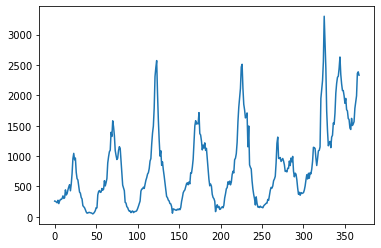

In [637]:
# Select the columns to plot
x = clinical_labs.index
y = clinical_labs['TOTAL SPECIMENS']
plt.plot(x, y) # Plot the data
plt.show() # Show the plot

In [638]:
# exlude specific columns
exclude_cols = ['REGION TYPE','REGION','% WEIGHTED ILI', '%UNWEIGHTED ILI','AGE 0-4', 'AGE 25-49', 'AGE 25-64', 
                'AGE 5-24', 'AGE 50-64', 'AGE 65']
clinical_labs = clinical_labs.loc[:, ~clinical_labs.columns.isin(exclude_cols)]
clinical_labs.head()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
0,2015,40,259,1,2,1.16,0.39,0.77
1,2015,41,256,1,1,0.78,0.39,0.39
2,2015,42,244,0,1,0.41,0.00,0.41
3,2015,43,231,0,1,0.43,0.00,0.43
4,2015,44,273,0,0,0.00,0.00,0.00


In [639]:
ilinet.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,States,Massachusetts,2015,40,X,0.790429,X,X,X,X,X,X,185,44,23405
1,States,Massachusetts,2015,41,X,0.643767,X,X,X,X,X,X,134,43,20815
2,States,Massachusetts,2015,42,X,0.733375,X,X,X,X,X,X,177,44,24135
3,States,Massachusetts,2015,43,X,0.589921,X,X,X,X,X,X,142,41,24071
4,States,Massachusetts,2015,44,X,0.667916,X,X,X,X,X,X,164,44,24554


In [640]:
ilinet.describe()

,YEAR,WEEK,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,2018.779891,26.690217,1.430763,901.364130,76.298913,58170.494565
std,2.059848,15.066852,1.126326,1017.475734,44.773396,37139.782560
min,2015.000000,1.000000,0.333677,27.000000,12.000000,6273.000000
25%,2017.000000,14.000000,0.695498,287.750000,45.000000,28108.000000
50%,2019.000000,27.000000,1.014380,551.000000,60.000000,51021.000000
75%,2021.000000,40.000000,1.723775,1118.000000,92.000000,68488.500000
max,2022.000000,53.000000,6.614120,6300.000000,186.000000,164848.000000


In [641]:
# exlude specific columns
exclude_cols = ['REGION TYPE','REGION','% WEIGHTED ILI', '%UNWEIGHTED ILI','AGE 0-4', 'AGE 25-49', 'AGE 25-64', 
                'AGE 5-24', 'AGE 50-64', 'AGE 65']
ilinet = ilinet.loc[:, ~ilinet.columns.isin(exclude_cols)]
ilinet.head()

,YEAR,WEEK,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,2015,40,185,44,23405
1,2015,41,134,43,20815
2,2015,42,177,44,24135
3,2015,43,142,41,24071
4,2015,44,164,44,24554


#### Merge Clinical and Ilinet Datasets

In [642]:
sample_df = clinical_labs.merge(ilinet, on=['YEAR','WEEK'])
sample_df.head()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,2015,40,259,1,2,1.16,0.39,0.77,185,44,23405
1,2015,41,256,1,1,0.78,0.39,0.39,134,43,20815
2,2015,42,244,0,1,0.41,0.00,0.41,177,44,24135
3,2015,43,231,0,1,0.43,0.00,0.43,142,41,24071
4,2015,44,273,0,0,0.00,0.00,0.00,164,44,24554


#### Visualizations

<AxesSubplot:xlabel='YEAR'>

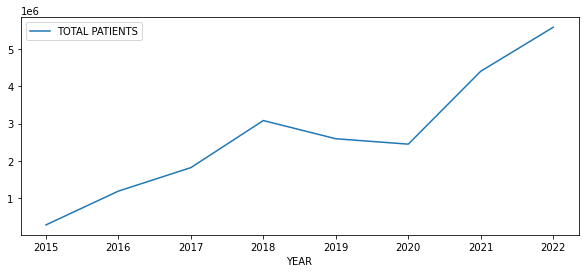

In [667]:
# visualize the outcome variable - Total number of patients over time
sample_df.groupby(["YEAR"])['TOTAL PATIENTS'].sum().reset_index().plot("YEAR","TOTAL PATIENTS", figsize=(10,4))

<AxesSubplot:xlabel='YEAR'>

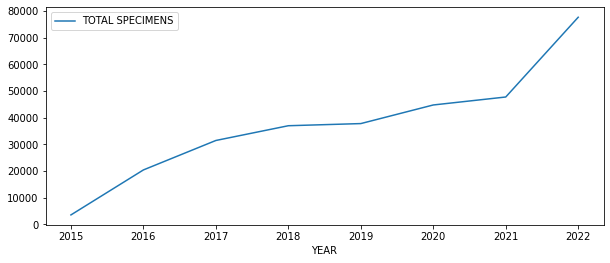

In [668]:
# visualize other total number of specimens collected over time
sample_df.groupby(["YEAR"])['TOTAL SPECIMENS'].sum().reset_index().plot("YEAR","TOTAL SPECIMENS", figsize=(10,4))


<AxesSubplot:xlabel='YEAR'>

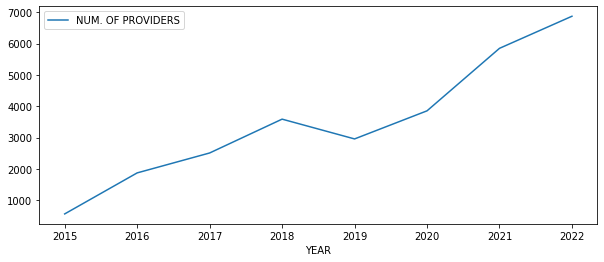

In [669]:
# visualize other total number of providers over time
sample_df.groupby(["YEAR"])['NUM. OF PROVIDERS'].sum().reset_index().plot("YEAR","NUM. OF PROVIDERS", figsize=(10,4))

<AxesSubplot:xlabel='YEAR'>

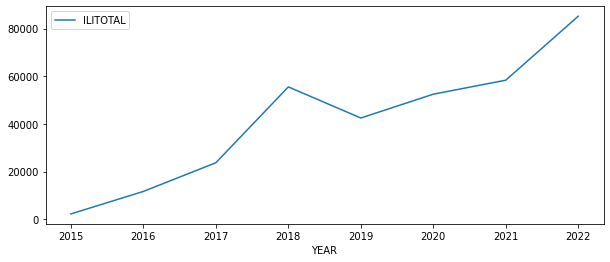

In [670]:
# visualize total number of ILI specimens subtyped over time time
sample_df.groupby(["YEAR"])['ILITOTAL'].sum().reset_index().plot("YEAR","ILITOTAL", figsize=(10,4))

In [622]:
# create a pandas profile of the data to get an overview of the analytic sample
#from pandas_profiling import ProfileReport
#prof = ProfileReport(sample_df)

#prof.to_file(output_file='sample_df_profile.html')
#prof

In [671]:
# encode categorical variables
cat_vars = ['YEAR','WEEK']

sample_df = pd.get_dummies(sample_df, columns=cat_vars)
sample_df.head()

,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,YEAR_2015,...,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52,WEEK_53
0,259,1,2,1.16,0.39,0.77,185,44,23405,1,...,0,0,0,0,0,0,0,0,0,0
1,256,1,1,0.78,0.39,0.39,134,43,20815,1,...,0,0,0,0,0,0,0,0,0,0
2,244,0,1,0.41,0.00,0.41,177,44,24135,1,...,0,0,0,0,0,0,0,0,0,0
3,231,0,1,0.43,0.00,0.43,142,41,24071,1,...,0,0,0,0,0,0,0,0,0,0
4,273,0,0,0.00,0.00,0.00,164,44,24554,1,...,1,0,0,0,0,0,0,0,0,0


In [672]:
sample_df.columns

Index(['TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B', 'PERCENT POSITIVE',
       'PERCENT A', 'PERCENT B', 'ILITOTAL', 'NUM. OF PROVIDERS',
       'TOTAL PATIENTS', 'YEAR_2015', 'YEAR_2016', 'YEAR_2017', 'YEAR_2018',
       'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'WEEK_1', 'WEEK_2',
       'WEEK_3', 'WEEK_4', 'WEEK_5', 'WEEK_6', 'WEEK_7', 'WEEK_8', 'WEEK_9',
       'WEEK_10', 'WEEK_11', 'WEEK_12', 'WEEK_13', 'WEEK_14', 'WEEK_15',
       'WEEK_16', 'WEEK_17', 'WEEK_18', 'WEEK_19', 'WEEK_20', 'WEEK_21',
       'WEEK_22', 'WEEK_23', 'WEEK_24', 'WEEK_25', 'WEEK_26', 'WEEK_27',
       'WEEK_28', 'WEEK_29', 'WEEK_30', 'WEEK_31', 'WEEK_32', 'WEEK_33',
       'WEEK_34', 'WEEK_35', 'WEEK_36', 'WEEK_37', 'WEEK_38', 'WEEK_39',
       'WEEK_40', 'WEEK_41', 'WEEK_42', 'WEEK_43', 'WEEK_44', 'WEEK_45',
       'WEEK_46', 'WEEK_47', 'WEEK_48', 'WEEK_49', 'WEEK_50', 'WEEK_51',
       'WEEK_52', 'WEEK_53'],
      dtype='object')

In [712]:
# look at the the top 20 correlated features (assumes a linear relationship)
sample_df.corr().reset_index()[['index','TOTAL PATIENTS']].sort_values(by='TOTAL PATIENTS', ascending=False).head(21)[1:]

,index,TOTAL PATIENTS
7,NUM. OF PROVIDERS,0.955075
16,YEAR_2022,0.722238
6,ILITOTAL,0.667133
0,TOTAL SPECIMENS,0.661620
15,YEAR_2021,0.289218
1,TOTAL A,0.101172
58,WEEK_42,0.032394
57,WEEK_41,0.031348
56,WEEK_40,0.026480
62,WEEK_46,0.020610


In [713]:
# look at the least correlated features (assumes a linear relationship)
sample_df.corr().reset_index()[['index','TOTAL PATIENTS']].sort_values(by='TOTAL PATIENTS', ascending=True).head(21)[1:]

,index,TOTAL PATIENTS
11,YEAR_2017,-0.253082
9,YEAR_2015,-0.185477
14,YEAR_2020,-0.132190
5,PERCENT B,-0.128460
13,YEAR_2019,-0.090539
3,PERCENT POSITIVE,-0.082182
4,PERCENT A,-0.034922
43,WEEK_27,-0.031493
38,WEEK_22,-0.029038
2,TOTAL B,-0.028891


In [680]:
# create the training (years 2015-2021) and test set (2022)
sample_df_train = sample_df[sample_df['YEAR_2022']==0]
sample_df_test = sample_df[sample_df['YEAR_2022']==1]

In [681]:
# remove target variable from feature column list
target_var = 'TOTAL PATIENTS'

feature_cols = sample_df.columns[~sample_df.columns.isin([target_var])]

# create feature matrix
X_train = sample_df_train[feature_cols].to_numpy()
X_test = sample_df_test[feature_cols].to_numpy()

# create response vector
y_train = sample_df_train[target_var].to_numpy()
y_test = sample_df_test[target_var].to_numpy()

### 2 - Linear Regression Model

In [687]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred = lin_reg.predict(X_test)

# evaluation metrics
print("R2 score:", metrics.r2_score(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))

R2 score: 0.3386222409410302
MSE:  210339518.09965464


### 3 - Polynomial Regression Models

In [715]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = metrics.mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

: 

: 

210339518.09965464